#Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/bank/bank.csv'
data = pd.read_csv(url, sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

Según la información asociada al DataSet:
* **age**: (numeric)
* **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* **marital**: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* **education**: (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* **default**: has credit in default? (categorical: "no","yes","unknown")
* **housing**: has housing loan? (categorical: "no","yes","unknown")
* **loan**: has personal loan? (categorical: "no","yes","unknown")
* **contact**: contact communication type (categorical: "cellular","telephone")
* **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* **previous**: number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
* **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
* **cons.price.idx**: consumer price index - monthly indicator (numeric)
* **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
* **euribor3m**: euribor 3 month rate - daily indicator (numeric)
* **nr.employed**: number of employees - quarterly indicator (numeric)
* **y**: has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data['y'].unique() #como se tiene denominado con strings como 'yes' o 'no', lo mejor es transformarlo a un binario siendo 'yes'=1 y 'no'=0

array(['no', 'yes'], dtype=object)

In [6]:
data['y'] = (data['y'] == 'yes').astype('int') #Transformamos los 'yes' de la columna 'y' a 1, y los 'no' a 0
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
data['education'].unique() #obtenemos los valores únicos de educación, que convendrá no tener tantos tipos

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data.groupby(by='education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,,,,,,,,,,
basic.4y,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
basic.6y,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228
basic.9y,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574
high.school,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921
illiterate,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
professional.course,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
university.degree,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264
unknown,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167


In [9]:
data['education'] = np.where(data['education'] == 'basic.4y','Basic',data['education']) #agrupamos 'basic.4y', 'basic.6y' y 'basic.9y' en simplemente 'basic'
data['education'] = np.where(data['education'] == 'basic.6y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.9y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'high.school','High School',data['education']) #el resto ya es una limpieza más estética
data['education'] = np.where(data['education'] == 'professional.course','Professional Course',data['education'])
data['education'] = np.where(data['education'] == 'university.degree','University Degree',data['education'])
data['education'] = np.where(data['education'] == 'unknown','Unknown',data['education'])
data['education'] = np.where(data['education'] == 'illiterate','Illiterate',data['education'])
data['education'].unique()


array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [10]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [13]:
pd.crosstab(data.education, data.y)

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


In [14]:
pd.crosstab(data.education, data.y).apply(lambda r: r/r.sum(), axis=1)

y,0,1
education,,
Basic,0.920390,0.079610
High School,0.894680,0.105320
Illiterate,1.000000,0.000000
Professional Course,0.878505,0.121495
University Degree,0.869462,0.130538
Unknown,0.844311,0.155689


Text(0, 0.5, 'Frecuencia de compra')

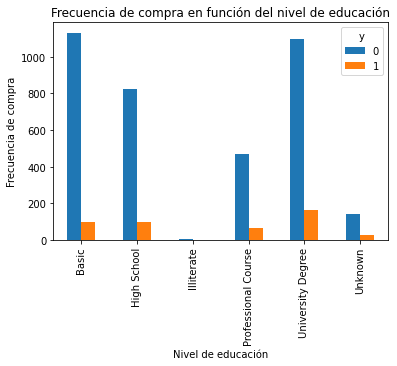

In [15]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra')

In [16]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(axis=1).astype('float'),axis=0)

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


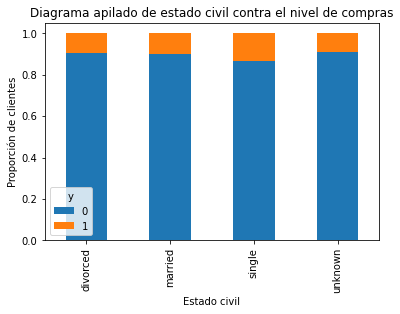

In [17]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Diagrama apilado de estado civil contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')
plt.show() #se observa que no influye mucho el estado civil en la compra

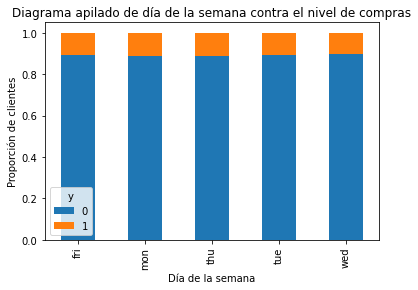

In [18]:
table = pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Diagrama apilado de día de la semana contra el nivel de compras')
plt.xlabel('Día de la semana')
plt.ylabel('Proporción de clientes')
plt.show() #se observa que no influye mucho el día de contacto con el cliente en la compra

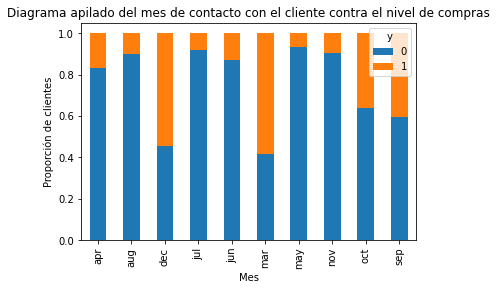

In [19]:
table = pd.crosstab(data.month,data.y)
table.div(table.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Diagrama apilado del mes de contacto con el cliente contra el nivel de compras')
plt.xlabel('Mes')
plt.ylabel('Proporción de clientes')
plt.show() #parece que sí que hay relación, pero conviene ver si es porque hay más datos de uno que de otro...así que mejor hacerlo sin stacked ni porcentajes para comprobar

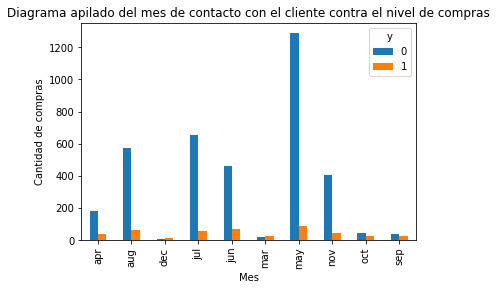

In [20]:
table = pd.crosstab(data.month,data.y)
table.plot(kind='bar')
plt.title('Diagrama apilado del mes de contacto con el cliente contra el nivel de compras')
plt.xlabel('Mes')
plt.ylabel('Cantidad de compras')
plt.show()

Text(0, 0.5, 'Frecuencia')

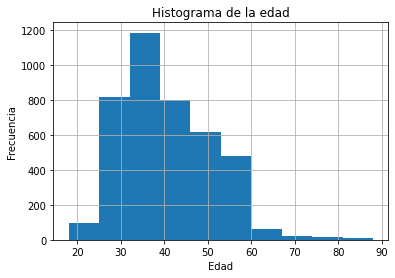

In [21]:
data.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

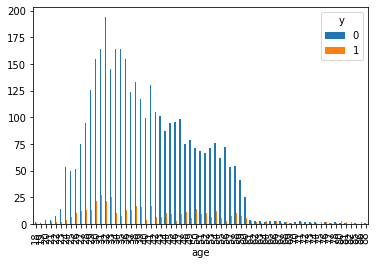

In [22]:
pd.crosstab(data.age,data.y).plot(kind='bar') #este tipo de gráficos donde una de ellas es continua aporta poco

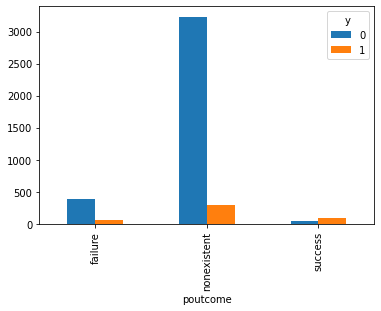

In [23]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar') #poutcome indicaba si tenía experiencia en bolsa

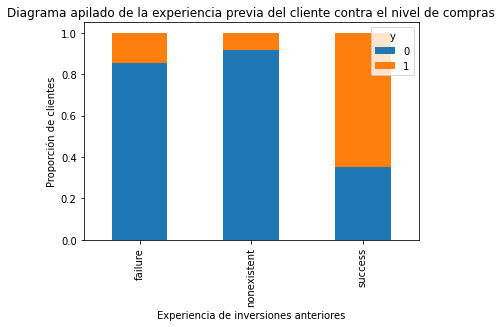

In [24]:
table = pd.crosstab(data.poutcome,data.y)
table.div(table.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Diagrama apilado de la experiencia previa del cliente contra el nivel de compras')
plt.xlabel('Experiencia de inversiones anteriores')
plt.ylabel('Proporción de clientes')
plt.show()

##Conversión de variables categóricas a dummies

In [25]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [26]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for category in categories:
  category_prefix = category
  category_dummies = pd.get_dummies(data[category],prefix=category_prefix)
  data = pd.concat([data,category_dummies], axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_High School,education_Illiterate,education_Professional Course,education_University Degree,education_Unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [27]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
 

In [28]:
bank_data = data.drop(categories, axis=1)
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_High School,education_Illiterate,education_Professional Course,education_University Degree,education_Unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [29]:
# Si solo quisiéramos los nombres de columnas...
#Y = ['y']
#X = [v for v in bank_data.columns.values.tolist() if v not in Y]
Y = bank_data['y']
bank_data.drop('y',axis=1, inplace=True)
X = bank_data

In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

#Selección de rasgos para el modelo

In [31]:
n = 12 #número de variables definitorias (a elegir)

In [32]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(max_iter=5000)
rfe = RFE(lr, n)
rfe = rfe.fit(X,Y)

In [34]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True])

In [35]:
rfe.ranking_

array([45, 43, 22, 48,  1, 21, 26, 25,  1, 33,  2, 15, 13, 36, 14,  1, 10,
       31,  3,  1,  1, 34, 19, 42, 35, 46, 39, 16,  7, 44, 32,  8, 29, 30,
       50, 11, 18, 49, 17, 24, 47,  9,  5,  1,  6,  1, 28,  4,  1,  1,  1,
       23, 20, 27, 41, 38, 40, 12,  1, 37,  1])

In [36]:
z = zip(bank_data.columns.values,rfe.support_)
list(z)

[('age', False),
 ('duration', False),
 ('campaign', False),
 ('pdays', False),
 ('previous', True),
 ('emp.var.rate', False),
 ('cons.price.idx', False),
 ('cons.conf.idx', False),
 ('euribor3m', True),
 ('nr.employed', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', True),
 ('job_self-employed', False),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', True),
 ('job_unemployed', True),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('marital_unknown', False),
 ('education_Basic', False),
 ('education_High School', False),
 ('education_Illiterate', False),
 ('education_Professional Course', False),
 ('education_University Degree', False),
 ('education_Unknown', False),
 ('default_no', False),
 ('default_unknown', False),
 ('default_yes', False),
 ('housing_no', False),
 ('housing_unknow

In [37]:
bank_data_representative_vars = bank_data.columns.values[rfe.support_ == True]
bank_data_representative_vars

array(['previous', 'euribor3m', 'job_retired', 'job_technician',
       'job_unemployed', 'month_apr', 'month_dec', 'month_mar',
       'month_may', 'month_nov', 'poutcome_failure', 'poutcome_success'],
      dtype=object)

In [38]:
X = bank_data[bank_data_representative_vars]
Y = Y
Y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

#Implementación del modelo en Python con statsmodel.api

In [39]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
logic_model = sm.Logit(Y,X) #ojo que con este primero son las predichas y luego las predictoras
result = logic_model.fit()

Optimization terminated successfully.
         Current function value: 0.277142
         Iterations 7


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Mon, 07 Sep 2020   Pseudo R-squ.:                  0.1977
Time:                        07:07:46   Log-Likelihood:                -1141.5
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                1.292e-113
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
previous             0.3016      0.139      2.167      0.030       0.029       0.574
euribor3m           -0.5712      0.021    -26.777      0.000      -0.613      -0.529
job_retired          0.1547      0.222      0.698      0.485      -0.280       0.590
job_technician       0.1289      0.147      0.879      0.379      -0.159       0.416
job_unemployed       0.2173      0.303      0.717      0.473      -0.377       0.811
month_apr           -0.7996      0.193     -4.146      0.000      -1.178      -0.422
month_dec            0.4853      0.465      1.044      0.296      -0.425       1.396
month_mar            0.8524      0.315      2.706      0.007       0.235       1.470
month_may           -1.2400      0.124    -10.018      0.000      -1.483      -0.997
month_nov           -0.5151      0.192     -2.687      0.007      -0.891      -0.139
poutcome_failure    -0.8225      0.249     -3.298      0.001      -1.311      -0.334
poutcome_success     0.9863      0.292      3.373      0.001       0.413       1.560
====================================================================================
"""

#Implementación del modelo en Python con scikit-learn (sklearn)

In [42]:
from sklearn import linear_model

In [43]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logit_model.score(X,Y)

0.9024034959941734

In [45]:
vars = pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))),columns=['variable', 'coeficiente'])

In [46]:
vars.sort_values(by='coeficiente',ascending=False)

,variable,coeficiente
11,poutcome_success,[1.0771968336529618]
7,month_mar,[0.9435201765907772]
6,month_dec,[0.5647300727396176]
0,previous,[0.3425287555342841]
4,job_unemployed,[0.2888006396814093]
2,job_retired,[0.2798862039840695]
3,job_technician,[0.188560102244329]
9,month_nov,[-0.40945352956585185]
1,euribor3m,[-0.5027562954773511]
5,month_apr,[-0.5795462904550139]


#Validación de modelo

Normalmente suele dividirse el dataset en un conjunto de training y otro de test, con la idea de entrenar al modelo con el primero y comprobar el error con el segundo, y así de esa forma poder detectar problemas de overfitting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = bank_data
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_High School,education_Illiterate,education_Professional Course,education_University Degree,education_Unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [49]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [51]:
lr = linear_model.LogisticRegression(max_iter=5000)
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predict = lr.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 1])

In [53]:
probs = lr.predict_proba(X_test) 
probs
#Con predict_proba se obtienen pares de valores que son la seguridad de la predicción y el valor de la predicción

array([[0.98708981, 0.01291019],
       [0.85561723, 0.14438277],
       [0.93910725, 0.06089275],
       ...,
       [0.71789111, 0.28210889],
       [0.98501571, 0.01498429],
       [0.38925418, 0.61074582]])

In [54]:
probs.transpose()[0].mean()

0.889721401734014

$Y_p=\begin{cases}0\ si\ p\leq0.5\\1\ si\ p>0.5\end{cases}$

In [55]:
#Por defecto está separado de la forma anterior, pero podremos cambiar ese porcentaje a partir de cual cambia de calificación operando con el array probs
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 #Es el porcentaje que usaremos a partir del cual cambia de valor. Si la probabilidad es superior a ese valor, ya lo calificaremos como compra.
prob_df['prediction'] = np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.012910,0
1,0.144383,1
2,0.060893,0
3,0.077454,0
4,0.011324,0


In [56]:
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,944
1,292


In [57]:
292/len(prob_df.prediction)*100

23.624595469255663

In [58]:
from sklearn import metrics
metrics.accuracy_score(Y_test,predict) #precisión del modelo, comparando predicciones con valores del conjunto de testing

0.906957928802589

#Validación cruzada

Hay tres tipos de validación cruzada, todos ellos obteniendo como valor final la media de la precisión de cada uno de ellos:
* **K-ITERACIONES:** Dividir el dataset en k conjuntos, y entrenar al modelo usando los k-1 conjuntos para train y el k para testing.
* **ALEATORIA:** Ejecutar k veces el entrenamiento tomando cada vez una distribución random en train y test (esta es la función definida a continuación)
* **DEJANDO UNO FUERA:** Ejecutarlo n veces (n = tamaño del dataset), tomando el valor n como test y el n-1 valores para training cada vez.

In [59]:
def cross_validation(X,Y,k):

  import pandas as pd
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import train_test_split
  from sklearn import metrics

  acuracy_array=[]

  for i in range(0,k):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
    lr = LogisticRegression(max_iter=5000)
    lr.fit(X_train,Y_train)

    predict = lr.predict(X_test)

    acuracy_array.append(metrics.accuracy_score(Y_test,predict))
  
  return acuracy_array, pd.DataFrame(acuracy_array).mean()

cross_validation(X,Y,10)

([0.912621359223301,
  0.901294498381877,
  0.9158576051779935,
  0.8915857605177994,
  0.8996763754045307,
  0.9061488673139159,
  0.906957928802589,
  0.9061488673139159,
  0.9029126213592233,
  0.9207119741100324],
 0    0.906392
 dtype: float64)

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
scores = cross_val_score(LogisticRegression(max_iter=5000), X, Y, scoring='accuracy',cv=10)

In [62]:
scores.tolist(), pd.DataFrame(scores).mean()

([0.9199029126213593,
  0.9077669902912622,
  0.912621359223301,
  0.9150485436893204,
  0.9174757281553398,
  0.9174757281553398,
  0.8932038834951457,
  0.9101941747572816,
  0.9223300970873787,
  0.9124087591240876],
 0    0.912843
 dtype: float64)

In [63]:
lr.coef_

array([[ 8.44438719e-03,  5.95120258e-03, -6.67033259e-02,
        -7.57014263e-04,  2.48205279e-01, -2.67880320e-01,
         4.52383322e-01,  6.65703646e-02, -1.29352918e-01,
        -8.48977122e-03,  1.37279431e-01,  1.26185605e-02,
        -1.57072648e-01,  1.80369940e-01,  2.98523609e-02,
        -2.28729401e-01, -7.69067134e-01,  2.34950048e-01,
         2.58974921e-01,  2.91924658e-01,  1.46700541e-01,
        -1.35117633e-01, -2.11419413e-01,  1.42588309e-01,
         1.78112103e-01, -1.06597355e-01,  4.94436818e-02,
         1.23680525e-02, -2.45073181e-02, -4.98143615e-02,
         1.76456622e-01, -1.61263033e-01, -2.90853560e-02,
         3.17690004e-02,  0.00000000e+00,  1.04136123e-01,
        -1.79927410e-01,  7.84749312e-02,  3.31347275e-02,
        -1.79927410e-01,  1.49476327e-01,  4.51958620e-01,
        -4.49274975e-01, -2.49555471e-01, -1.18230614e-02,
         3.12616370e-01, -6.99388622e-02,  7.27758193e-01,
         1.22596203e+00, -8.94349660e-01, -6.22236030e-0

#Matrices de Confusión y curvas ROC

In [105]:
def curva_ROC(X,Y):

  #importación de librerías
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
  lr = LogisticRegression(max_iter=5000)
  lr.fit(X_train,Y_train)
  probs = lr.predict_proba(X_test)
  prob_df = pd.DataFrame(probs[:,1])

  predict_df = pd.DataFrame()

  for t in np.arange(0, 1.01, 0.01):
    threshold = t 
    prediction = np.where(prob_df[0]>threshold,1,0)
    predict_df['t'+str(round(threshold, 2))] = prediction

  sensibility_array = []

  for i in range(len(predict_df.columns.values)):

    TP = 0
    FN = 0
    FP = 0
    TN = 0

    data_prediction = predict_df.iloc[:,i].tolist()
    data_real = Y_test.tolist()

    for j in range(len(data_prediction)):

      prediction = int(data_prediction[j])
      test = int(data_real[j])

      if prediction == 1:
        if test == 1: 
          TP += 1
        else: 
          FP += 1
      else:
        if test == 1: 
          FN += 1
        else:
          TN += 1

    sensibility_array.append([TP/(TP+FN),TN/(TN+FP)])

  return sensibility_array
  
res = curva_ROC(X,Y)

In [106]:
res

[[1.0, 0.0],
 [1.0, 0.23160762942779292],
 [0.9925925925925926, 0.5149863760217984],
 [0.9777777777777777, 0.6557674841053588],
 [0.9629629629629629, 0.7202543142597638],
 [0.9629629629629629, 0.7584014532243415],
 [0.9481481481481482, 0.7829246139872843],
 [0.9333333333333333, 0.8056312443233424],
 [0.9259259259259259, 0.8237965485921889],
 [0.9259259259259259, 0.8419618528610354],
 [0.8962962962962963, 0.851952770208901],
 [0.8740740740740741, 0.860127157129882],
 [0.8592592592592593, 0.8683015440508629],
 [0.8518518518518519, 0.8755676657584015],
 [0.8444444444444444, 0.8810172570390554],
 [0.8444444444444444, 0.8910081743869209],
 [0.8, 0.8955495004541326],
 [0.7777777777777778, 0.9019073569482289],
 [0.7555555555555555, 0.9055404178019982],
 [0.7111111111111111, 0.9109900090826522],
 [0.6814814814814815, 0.9155313351498637],
 [0.6518518518518519, 0.9191643960036331],
 [0.6370370370370371, 0.92188919164396],
 [0.6148148148148148, 0.924613987284287],
 [0.5925925925925926, 0.93006357

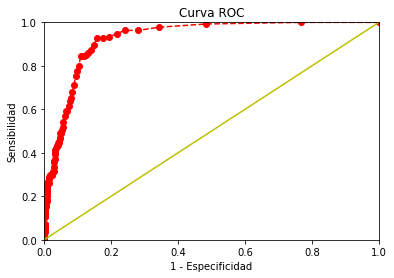

In [107]:
import matplotlib.pyplot as plt
TPR = [res[x][0] for x in range(len(res))]
TNR = [(1-res[x][1]) for x in range(len(res))]
plt.plot(TNR,TPR,'ro--')
plt.plot([0,1],[0,1],'y-')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [67]:
#aunque anteriormente se ha hecho con un condicional para obtener TN, FP, FN y TN, también se puede con una crosstable a partir de un DataFrame con la y_predict y la y_real

In [85]:
from sklearn import metrics

In [88]:
probs[:,1]

array([0.01291019, 0.14438277, 0.06089275, ..., 0.28210889, 0.01498429,
       0.61074582])

In [91]:
especificidad, sensibilidad, _ = metrics.roc_curve(Y_test, probs[:,1]) 
#realmente devuelve la abcisa de la curva ROC como primer valor, que es 1 - especificidad

In [95]:
df_ROC = pd.DataFrame({
    'x': especificidad,
    'y': sensibilidad
})
df_ROC.head()

,x,y
0,0.000000,0.000000
1,0.000898,0.000000
2,0.001795,0.000000
3,0.001795,0.008197
4,0.003591,0.008197


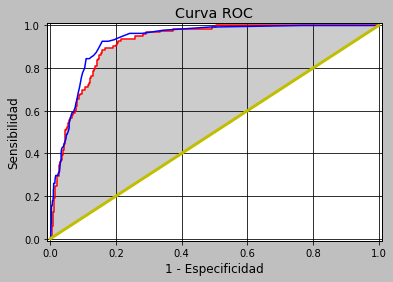

In [129]:
plt.plot(df_ROC['x'], df_ROC['y'],'r-')
plt.plot(TNR,TPR,'b-')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.fill_between(df_ROC['x'], df_ROC['y'],[z for z in df_ROC['x']], alpha=0.2)
plt.plot([0,1],[0,1],'y-',linewidth=3)
plt.show()

In [117]:
auc = metrics.auc(especificidad, sensibilidad) #area bajo la curva, máximo optimizable es 1.00
auc

0.9174515113164788